![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">
   
<div style="text-align: center;">
    <img src="https://user-images.githubusercontent.com/7065401/76784111-d46c2f00-6791-11ea-8c65-39d7a7c9d8c0.jpg" style="max-width: 600px; width:100%;" />
</div>

## PART 2
# Analyzing the epidemiological outbreak of COVID‐19

A visual exploratory data analysis approach.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import theme

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data loading and wrangling

We will load COVID-19 data from the [GitHub data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

As we already known the data, we'll go faster now:

In [2]:
COVID_CONFIRMED_WORLD_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_WORLD_URL)

COVID_DEATHS_WORLD_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_WORLD_URL)

In [3]:
print(covid_confirmed.shape)
print(covid_deaths.shape)

(274, 416)
(274, 416)


In [4]:
def add_us_states_data(url, df):
    # remove global US data
    df = df.loc[df['Country/Region'] != 'US']
    
    # read and add US states data
    aux = pd.read_csv(url)
    aux = aux.groupby('Province_State').sum().reset_index()
    aux['Province/State'] = aux['Province_State']
    aux['Country/Region'] = 'US'
    aux['Lat'] = 40.000
    aux['Long'] = -100.000
    aux.drop(['UID', 'FIPS', 'code3', 'Province_State', 'Lat', 'Long_'], axis=1, inplace=True)
    
    if ('Population' in aux.columns):
        aux.drop(['Population'], axis=1, inplace=True)

    return df.append(aux)


COVID_CONFIRMED_US_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_confirmed = add_us_states_data(COVID_CONFIRMED_US_URL, covid_confirmed)

COVID_DEATHS_US_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
covid_deaths = add_us_states_data(COVID_DEATHS_US_URL, covid_deaths)

In [5]:
print(covid_confirmed.shape)
print(covid_deaths.shape)

(331, 416)
(331, 416)


In [6]:
covid_confirmed.head()

Province/State Country/Region     Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  \
0            NaN    Afghanistan  33.939 67.710        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1        1       1       1       2       4       4       4       4       5       7        8       11       12       13       15       16       18       20       24       25       29       30       34       41       43       76       80       91      107      118      146      175     197     240     275     300     338     368     424     445     485      532      556      608      666      715      785      841      907      934      997     1027     1093     1177     1236     1331     1464     1532     1704     1830     1940     2127    2291    2470    2705    2895    3225    3393    3564    3781    4042   
1            NaN        Albania  41.153 20.168        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       2       10       12       23       33       38       42       51       55       59       64       70       76       89      104      123      146      174      186      197      212      223      243     259     277     304     333     361     377     383     400     409      416      433      446      467      475      494      518      539      548      562      584      609      634      663      678      712      726      736      750      766      773     782     789     795     803     820     832     842     850     856   
2            NaN        Algeria  28.034  1.660        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1       1       3       5      12      12      17      17      19      20       20       20       24       26       37       48       54       60       74       87       90      139      201      230      264      302      367      409      454      511      584      716     847     986    1171    1251    1320    1423    1468    1572    1666     1761     1825     1914     1983     2070     2160     2268     2418     2534     2629     2718     2811     2910     3007     3127     3256     3382     3517     3649     3848     4006    4154    4295    4474    4648    4838    4997    5182    5369    5558   
3            NaN      

First convert all the data to long format:

In [7]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                            id_vars=covid_deaths.iloc[:, :4],
                            var_name='date',
                            value_name='deaths')

In [8]:
covid_confirmed_long.shape

(136372, 6)

In [9]:
covid_confirmed_long.head()

Province/State Country/Region     Lat   Long     date  confirmed
0            NaN    Afghanistan  33.939 67.710  1/22/20          0
1            NaN        Albania  41.153 20.168  1/22/20          0
2            NaN        Algeria  28.034  1.660  1/22/20          0
3            NaN        Andorra  42.506  1.522  1/22/20          0
4            NaN         Angola -11.203 17.874  1/22/20          0

Why having three separated `DataFrame`s? Let's merge them.

> You can learn these advance Pandas topics in detail on our [_**Data Wrangling**_ course](https://my.ine.com/DataScience/courses/30c9af81/intro-to-pandas-for-data-analysis/)!


In [10]:
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']

In [11]:
print(covid_df.shape)

covid_df.head()

(136372, 7)


Province/State Country/Region     Lat   Long     date  confirmed  deaths
0            NaN    Afghanistan  33.939 67.710  1/22/20          0       0
1            NaN        Albania  41.153 20.168  1/22/20          0       0
2            NaN        Algeria  28.034  1.660  1/22/20          0       0
3            NaN        Andorra  42.506  1.522  1/22/20          0       0
4            NaN         Angola -11.203 17.874  1/22/20          0       0

---
### Data cleaning

As we did before replace `Mainland china` with just `China`, and fill some missing values.

In [12]:
covid_df['Country/Region'].replace('Mainland China', 'China', inplace=True)

In [13]:
covid_df[['Province/State']] = covid_df[['Province/State']].fillna('')

In [14]:
covid_df.fillna(0, inplace=True)

Final checks:

In [15]:
covid_df.isna().sum().sum()

0

In [16]:
covid_df['confirmed'] /= 1_000_000
covid_df['deaths'] /= 1_000_000

---
### Save `DataFrame` to CSV file
 
Now persist our `DataFrame` to disk using `to_csv()` pandas method.

In [17]:
covid_df.to_csv('covid_df.csv', index=None)

Load it again and check if everything is ok:

In [18]:
pd.read_csv('covid_df.csv')

Province/State Country/Region     Lat     Long     date  confirmed  deaths
0                 NaN    Afghanistan  33.939   67.710  1/22/20      0.000   0.000
1                 NaN        Albania  41.153   20.168  1/22/20      0.000   0.000
2                 NaN        Algeria  28.034    1.660  1/22/20      0.000   0.000
3                 NaN        Andorra  42.506    1.522  1/22/20      0.000   0.000
4                 NaN         Angola -11.203   17.874  1/22/20      0.000   0.000
...               ...            ...     ...      ...      ...        ...     ...
136367       Virginia             US   0.000 -100.000   3/8/21      0.587   0.010
136368     Washington             US   0.000 -100.000   3/8/21      0.346   0.005
136369  West Virginia             US   0.000 -100.000   3/8/21      0.134   0.002
136370      Wisconsin             US   0.000 -100.000   3/8/21      0.622   0.007
136371        Wyoming             US   0.000 -100.000   3/8/21      0.055   0.001

[136372 rows x 7 columns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Country analysis

Now we'll analyze COVID-19 cases for each country.

In [19]:
covid_df.head()

Province/State Country/Region     Lat   Long     date  confirmed  deaths
0                   Afghanistan  33.939 67.710  1/22/20      0.000   0.000
1                       Albania  41.153 20.168  1/22/20      0.000   0.000
2                       Algeria  28.034  1.660  1/22/20      0.000   0.000
3                       Andorra  42.506  1.522  1/22/20      0.000   0.000
4                        Angola -11.203 17.874  1/22/20      0.000   0.000

Now it's time to to aggregate the data by `Country/Region` and `Province/State` before continue.

First, group the data by `Country/Region` and `Province/State` at the same time, so we can get the `max()` value for each `Province/State` over the time.

In [20]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

covid_countries_df

Country/Region Province/State     Lat    Long    date  confirmed  deaths
0           Afghanistan                 33.939  67.710  9/9/20      0.056   0.002
1               Albania                 41.153  20.168  9/9/20      0.114   0.002
2               Algeria                 28.034   1.660  9/9/20      0.114   0.003
3               Andorra                 42.506   1.522  9/9/20      0.011   0.000
4                Angola                -11.203  17.874  9/9/20      0.021   0.001
..                  ...            ...     ...     ...     ...        ...     ...
326             Vietnam                 14.058 108.277  9/9/20      0.003   0.000
327  West Bank and Gaza                 31.952  35.233  9/9/20      0.199   0.002
328               Yemen                 15.553  48.516  9/9/20      0.003   0.001
329              Zambia                -13.134  27.849  9/9/20      0.083   0.001
330            Zimbabwe                -19.015  29.155  9/9/20      0.036   0.001

[331 rows x 7 columns]

Finally, group the data again by `Country/Region` and this time get the `sum()` of the cases of every `Province/State` over the country.

In [21]:
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

covid_countries_df

Country/Region     Lat    Long  confirmed  deaths
0           Afghanistan  33.939  67.710      0.056   0.002
1               Albania  41.153  20.168      0.114   0.002
2               Algeria  28.034   1.660      0.114   0.003
3               Andorra  42.506   1.522      0.011   0.000
4                Angola -11.203  17.874      0.021   0.001
..                  ...     ...     ...        ...     ...
187             Vietnam  14.058 108.277      0.003   0.000
188  West Bank and Gaza  31.952  35.233      0.199   0.002
189               Yemen  15.553  48.516      0.003   0.001
190              Zambia -13.134  27.849      0.083   0.001
191            Zimbabwe -19.015  29.155      0.036   0.001

[192 rows x 5 columns]

Remove unused `Lat` and `Long` columns:

In [22]:
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

covid_countries_df

Country/Region  confirmed  deaths
0           Afghanistan      0.056   0.002
1               Albania      0.114   0.002
2               Algeria      0.114   0.003
3               Andorra      0.011   0.000
4                Angola      0.021   0.001
..                  ...        ...     ...
187             Vietnam      0.003   0.000
188  West Bank and Gaza      0.199   0.002
189               Yemen      0.003   0.001
190              Zambia      0.083   0.001
191            Zimbabwe      0.036   0.001

[192 rows x 3 columns]

Done, we can now start getting insights from our `covid_countries_df` data.

---
### Which are the top-10 countries with more `confirmed` cases?

In [23]:
top_10_confirmed = covid_countries_df.sort_values(by='confirmed', ascending=False).head(10)

top_10_confirmed

Country/Region  confirmed  deaths
178              US     29.039   0.526
79            India     11.245   0.158
23           Brazil     11.052   0.266
142          Russia      4.284   0.088
182  United Kingdom      4.236   0.125
62           France      3.970   0.089
162           Spain      3.205   0.071
85            Italy      3.081   0.100
177          Turkey      2.794   0.029
66          Germany      2.514   0.072

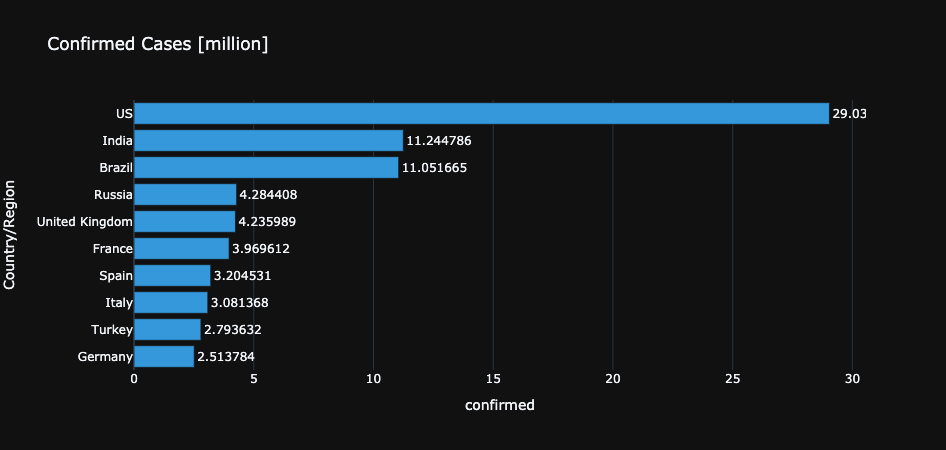

In [24]:
fig = px.bar(top_10_confirmed.sort_values(by='confirmed', ascending=True),
             x="confirmed", y="Country/Region",
             title='Confirmed Cases [million]', text='confirmed',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#3498db', textposition='outside')

fig.show()

---
### Which are the top-10 countries with more `death` cases?

In [25]:
top_10_deaths = covid_countries_df.sort_values(by='deaths', ascending=False).head(10)

top_10_deaths

Country/Region  confirmed  deaths
178              US     29.039   0.526
23           Brazil     11.052   0.266
114          Mexico      2.130   0.191
79            India     11.245   0.158
182  United Kingdom      4.236   0.125
85            Italy      3.081   0.100
62           France      3.970   0.089
142          Russia      4.284   0.088
66          Germany      2.514   0.072
162           Spain      3.205   0.071

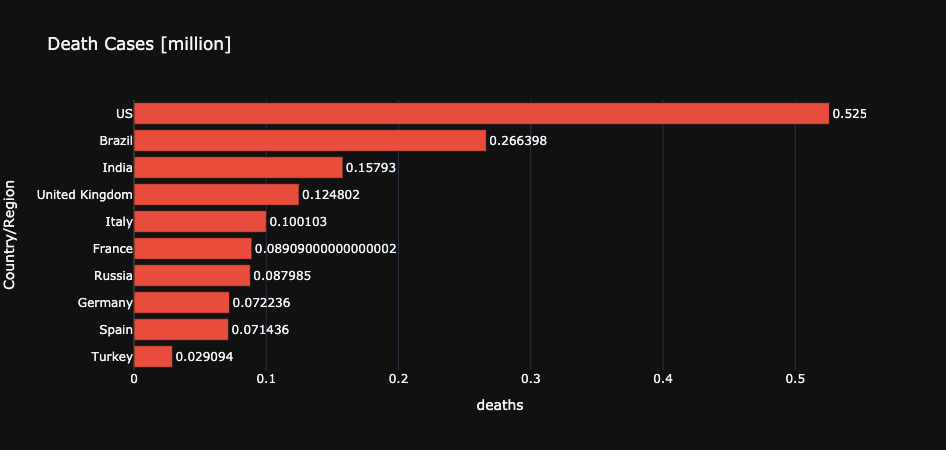

In [26]:
fig = px.bar(top_10_confirmed.sort_values(by='deaths', ascending=True),
             x="deaths", y="Country/Region",
             title='Death Cases [million]', text='deaths',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#e74c3c', textposition='outside')

fig.show()

---
### Which are the top-20 countries with higher `mortality rate`?

Analyze `mortality rate` just if the country has at least 100 confirmed cases.

In [27]:
covid_countries_df

Country/Region  confirmed  deaths
0           Afghanistan      0.056   0.002
1               Albania      0.114   0.002
2               Algeria      0.114   0.003
3               Andorra      0.011   0.000
4                Angola      0.021   0.001
..                  ...        ...     ...
187             Vietnam      0.003   0.000
188  West Bank and Gaza      0.199   0.002
189               Yemen      0.003   0.001
190              Zambia      0.083   0.001
191            Zimbabwe      0.036   0.001

[192 rows x 3 columns]

In [28]:
covid_countries_df['mortality_rate'] = round(covid_countries_df['deaths'] / covid_countries_df['confirmed'] * 100, 2)

top_20_mortality_rate = covid_countries_df.sort_values(by='mortality_rate', ascending=False).head(20)

top_20_mortality_rate

Country/Region  confirmed  deaths  mortality_rate
189                   Yemen      0.003   0.001          25.660
104              MS Zaandam      0.000   0.000          22.220
114                  Mexico      2.130   0.191           8.960
168                   Syria      0.016   0.001           6.660
164                   Sudan      0.031   0.002           6.270
53                    Egypt      0.187   0.011           5.900
52                  Ecuador      0.295   0.016           5.450
36                    China      0.101   0.005           4.780
20                  Bolivia      0.255   0.012           4.650
0               Afghanistan      0.056   0.002           4.390
99                  Liberia      0.002   0.000           4.200
109                    Mali      0.009   0.000           4.160
171                Tanzania      0.001   0.000           4.130
191                Zimbabwe      0.036   0.001           4.100
25                 Bulgaria      0.263   0.011           4.090
38                  Comoros      0.004   0.000           4.050
21   Bosnia and Herzegovina      0.137   0.005           3.860
58                 Eswatini      0.017   0.001           3.830
127                   Niger      0.005   0.000           3.670
159                 Somalia      0.008   0.000           3.640

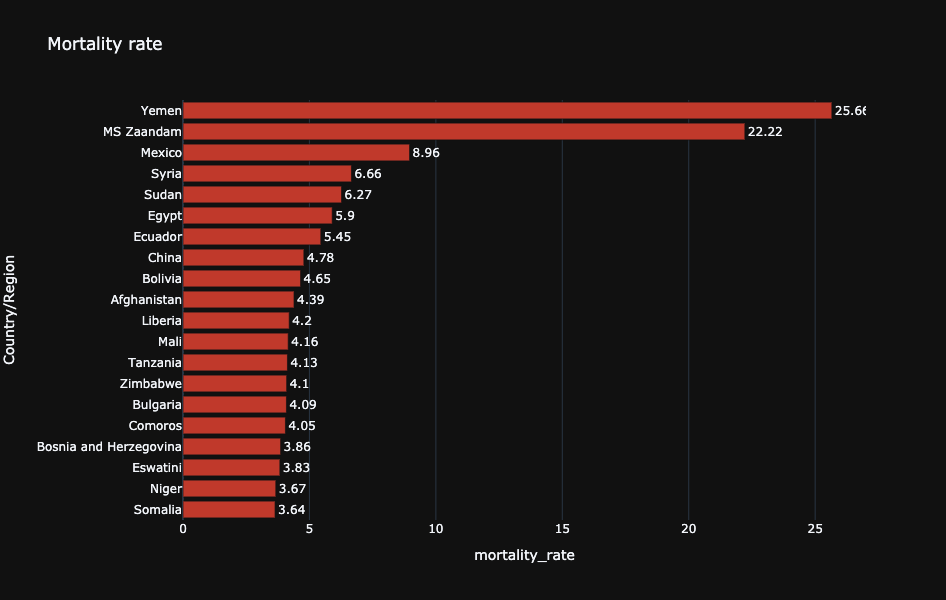

In [29]:
fig = px.bar(top_20_mortality_rate.sort_values(by='mortality_rate', ascending=True),
             x="mortality_rate", y="Country/Region",
             title='Mortality rate', text='mortality_rate',
             template='plotly_dark', orientation='h',
             width=700, height=600)

fig.update_traces(marker_color='#c0392b', textposition='outside')

fig.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Country analysis over the time

Another useful graphic could be exploring confirmed cases per country over the time.

Let's aggregate values, grouping by `Country/Region` and `date`.

> Hint! the `sort=False` parameter will keep our dates ordered.

In [30]:
covid_df.groupby(['Country/Region', 'date'], sort=False).sum()

Lat       Long  confirmed  deaths
Country/Region     date                                         
Afghanistan        1/22/20  33.939     67.710      0.000   0.000
Albania            1/22/20  41.153     20.168      0.000   0.000
Algeria            1/22/20  28.034      1.660      0.000   0.000
Andorra            1/22/20  42.506      1.522      0.000   0.000
Angola             1/22/20 -11.203     17.874      0.000   0.000
...                            ...        ...        ...     ...
West Bank and Gaza 3/8/21   31.952     35.233      0.199   0.002
Yemen              3/8/21   15.553     48.516      0.003   0.001
Zambia             3/8/21  -13.134     27.849      0.083   0.001
Zimbabwe           3/8/21  -19.015     29.155      0.036   0.001
US                 3/8/21    0.000 -5,800.000     29.039   0.526

[79104 rows x 4 columns]

In [31]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()
covid_countries_date_df.drop(['Lat', 'Long'], axis=1, inplace=True)

covid_countries_date_df.set_index('date', inplace=True)
covid_countries_date_df.index = pd.to_datetime(covid_countries_date_df.index)
covid_countries_date_df = covid_countries_date_df.groupby('Country/Region').resample('MS').sum().reset_index()
covid_countries_date_df.set_index('date', inplace=True)
covid_countries_date_df.index = covid_countries_date_df.index.astype(str)

covid_countries_date_df.head()

Country/Region  confirmed  deaths
date                                        
2020-01-01    Afghanistan      0.000   0.000
2020-02-01    Afghanistan      0.000   0.000
2020-03-01    Afghanistan      0.001   0.000
2020-04-01    Afghanistan      0.027   0.001
2020-05-01    Afghanistan      0.226   0.005

Now just filter the data from countries you want to analyze:

In [32]:
covid_US = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'US']
covid_US = covid_US.drop(covid_US.tail(1).index)

covid_US

Country/Region  confirmed  deaths
date                                        
2020-01-01             US      0.000   0.000
2020-02-01             US      0.000   0.000
2020-03-01             US      1.120   0.026
2020-04-01             US     19.959   1.070
2020-05-01             US     45.534   2.803
2020-06-01             US     64.964   3.574
2020-07-01             US    111.364   4.327
2020-08-01             US    166.329   5.267
2020-09-01             US    199.147   5.885
2020-10-01             US    251.253   6.792
2020-11-01             US    339.477   7.500
2020-12-01             US    527.332   9.669
2021-01-01             US    729.338  12.426
2021-02-01             US    772.409  13.596

In [33]:
covid_China = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'China']
covid_China = covid_China.drop(covid_China.tail(1).index)

covid_Italy = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Italy']
covid_Italy = covid_Italy.drop(covid_Italy.tail(1).index)

covid_Germany = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Germany']
covid_Germany = covid_Germany.drop(covid_Germany.tail(1).index)

covid_Spain = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Spain']
covid_Spain = covid_Spain.drop(covid_Spain.tail(1).index)

covid_Argentina = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']
covid_Argentina = covid_Argentina.drop(covid_Argentina.tail(1).index)

I also add a calculated `World except China` containing all the cases in the world excepting the cases in China.

In [34]:
covid_no_China = covid_countries_date_df[covid_countries_date_df['Country/Region'] != 'China']
covid_no_China = covid_no_China.drop(covid_no_China.tail(1).index)

covid_no_China = covid_no_China.groupby('date', sort=False).sum().reset_index()

In [35]:
covid_no_China.head()

date  confirmed  deaths
0  2020-01-01      0.001   0.000
1  2020-02-01      0.039   0.000
2  2020-03-01      6.542   0.301
3  2020-04-01     61.070   4.243
4  2020-05-01    142.606   9.540

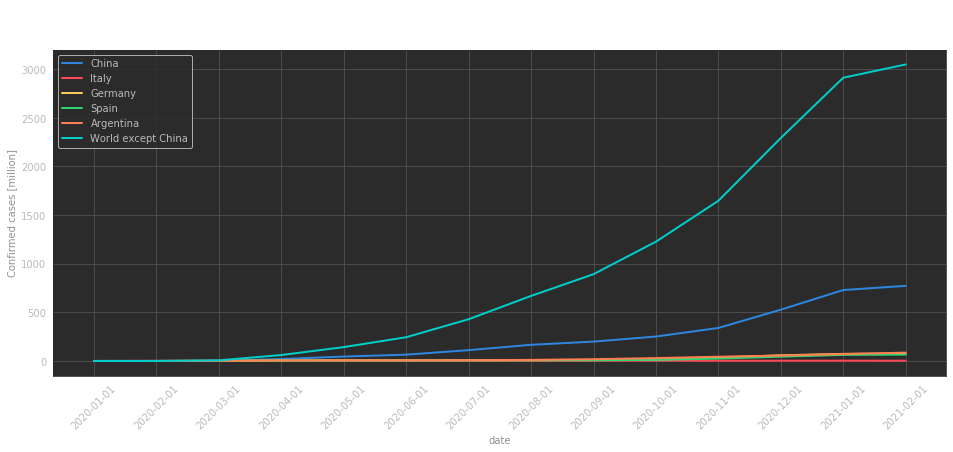

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_US.index, y=covid_US['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_China.index, y=covid_China['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_Italy.index, y=covid_Italy['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_Germany.index, y=covid_Germany['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_Spain.index, y=covid_Spain['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_no_China.index, y=covid_no_China['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases [million]')

ax.legend(['China', 'Italy', 'Germany', 'Spain', 'Argentina', 'World except China'])

plt.show()

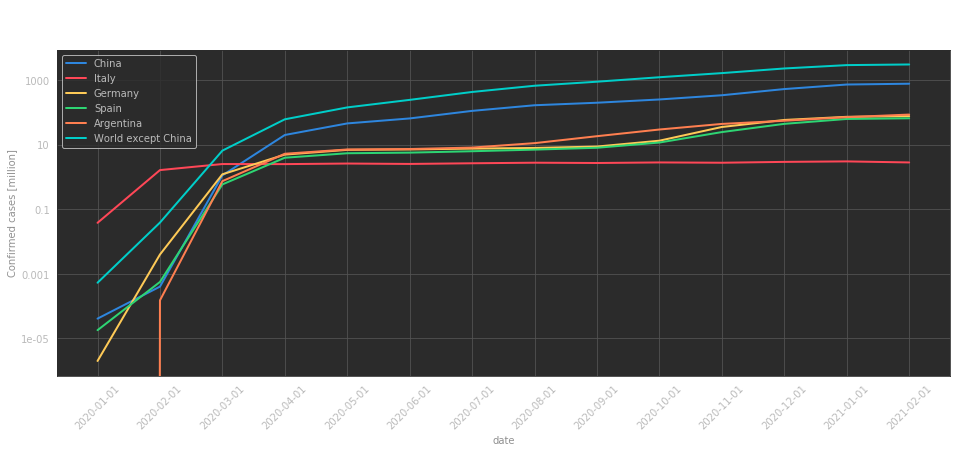

In [37]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_US.index, y=covid_US['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_China.index, y=covid_China['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_Italy.index, y=covid_Italy['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_Germany.index, y=covid_Germany['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_Spain.index, y=covid_Spain['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=covid_no_China.index, y=covid_no_China['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country confirmed cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases [million]')

ax.legend(['China', 'Italy', 'Germany', 'Spain', 'Argentina', 'World except China'])

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Custom country analyzer 

Finally we'll create our custom `get_country_covid_info(country, log)` function to analyze countries. This function will receive `country` and `log` parameters to filter desired country and apply -or not- logarithmic scale.

That function will return some cool plots showing the country COVID-19 cases. To make these plots, we'll create another helper functions: `plot_country_global_info()`, `plot_country_cases_over_time()` and `plot_province_cases()`.


In [38]:
def plot_country_global_info(country):
    country_info = covid_countries_df[covid_countries_df['Country/Region'] == country]

    country_info_long = country_info.melt(value_vars=['confirmed'],
                                          var_name="status",
                                          value_name="count")

    country_info_long['upper'] = 'Confirmed cases [million]'
    
    fig = px.treemap(country_info_long, path=["upper", "status"], values="count",
                     title=f"Total COVID-19 confirmed cases in {country}",
                     color_discrete_sequence=['#3498db', '#2ecc71', '#e74c3c'],
                     template='plotly_dark')

    fig.data[0].textinfo = 'label+text+value'

    fig.show()

In [49]:
def plot_country_cases_over_time(country, log):
    country_date_info = covid_countries_date_df[covid_countries_date_df['Country/Region'] == country]
    country_date_info = country_date_info.loc[country_date_info.index != country_date_info.tail(1).index[0]]
    
    fig, ax = plt.subplots(figsize=(16, 6))

    if log:
        ax.set(yscale="log")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
        plt.title("(logarithmic scale)", color='white')

    sns.lineplot(x=country_date_info.index, y=country_date_info['confirmed'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info.index, y=country_date_info['deaths'], sort=False, linewidth=2)
                
    ax.lines[0].set_linestyle("--")

    plt.suptitle(f"COVID-19 cases in {country} over the time", fontsize=16, fontweight='bold', color='white')

    plt.xticks(rotation=45)
    plt.ylabel('Number of cases [million]')

    ax.legend(['Confirmed', 'Deaths'])

    plt.show()

In [50]:
def plot_province_cases(country):
    covid_provinces_df = covid_df.groupby(['Province/State', 'Country/Region']).max().reset_index()
    
    country_provinces_info = covid_provinces_df[covid_provinces_df['Country/Region'] == country]
    country_provinces_info = country_provinces_info.drop(country_provinces_info.tail(1).index)

    has_provinces = country_provinces_info.shape[0] > 1
    
    if (has_provinces):
        country_info_long = country_provinces_info.melt(id_vars=['Province/State'],
                                                        value_vars=['confirmed'],
                                                        var_name="status",
                                                        value_name="count")

        country_info_long['upper'] = 'Confirmed cases'

        fig = px.treemap(country_info_long, path=['upper', "Province/State", "status"],
                         values="count",
                         title=f"Number of COVID-19 confirmed cases per Province/State in {country}",
                         template='plotly_dark')
        
        fig.data[0].textinfo = 'label+text+value'

        fig.show()
    else:
        print('There is no information of provinces/states')

In [51]:
def get_country_covid_info(country, log=False):
    plot_country_cases_over_time(country, log)

    plot_country_global_info(country)
        
    plot_province_cases(country)

Finally, let's make some calls to our function:

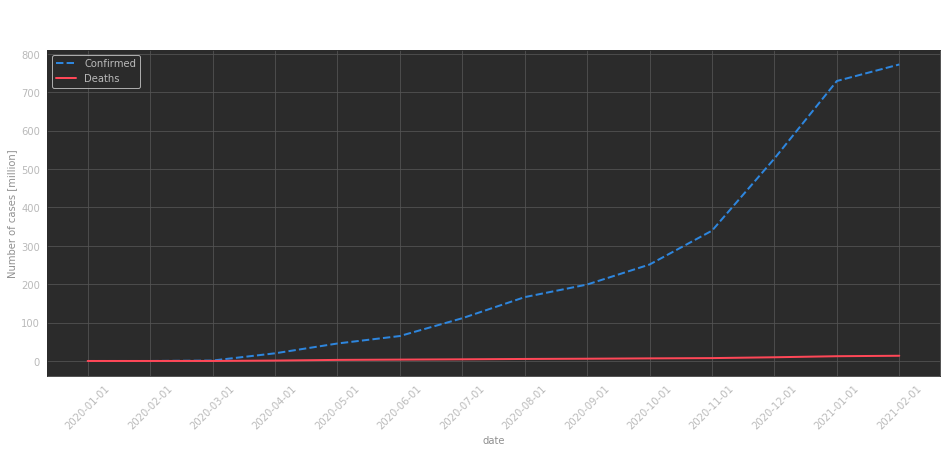

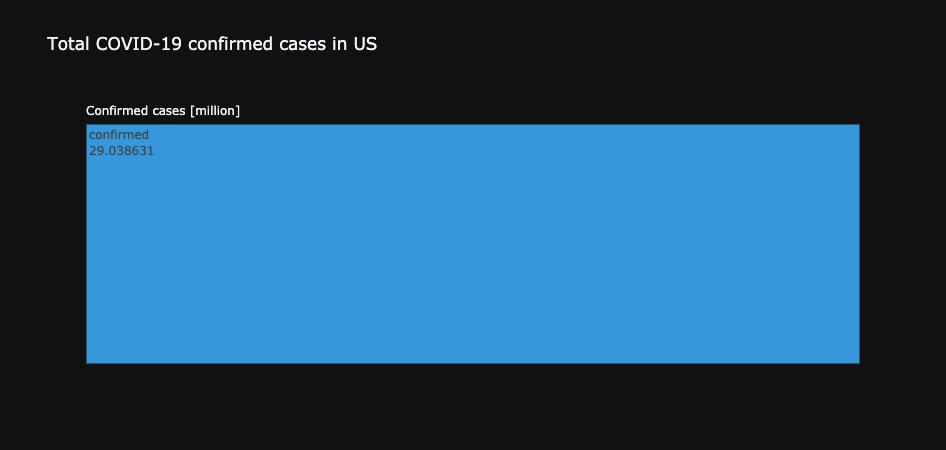

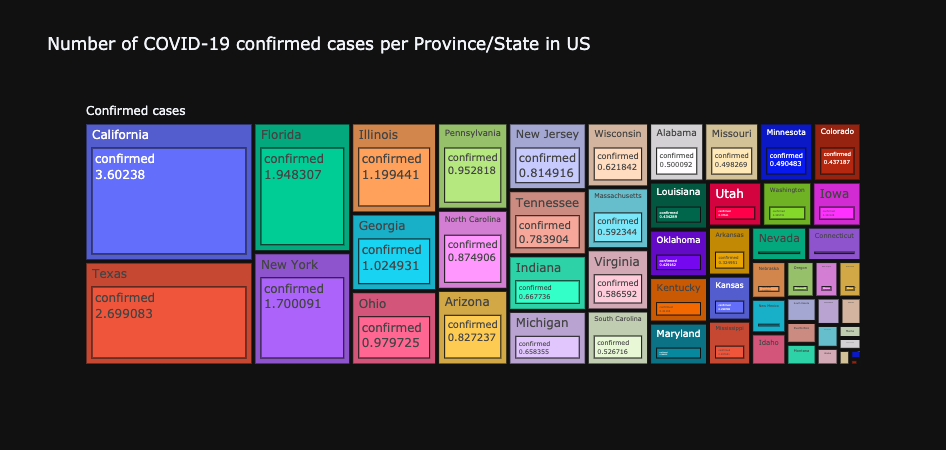

In [52]:
get_country_covid_info('US')

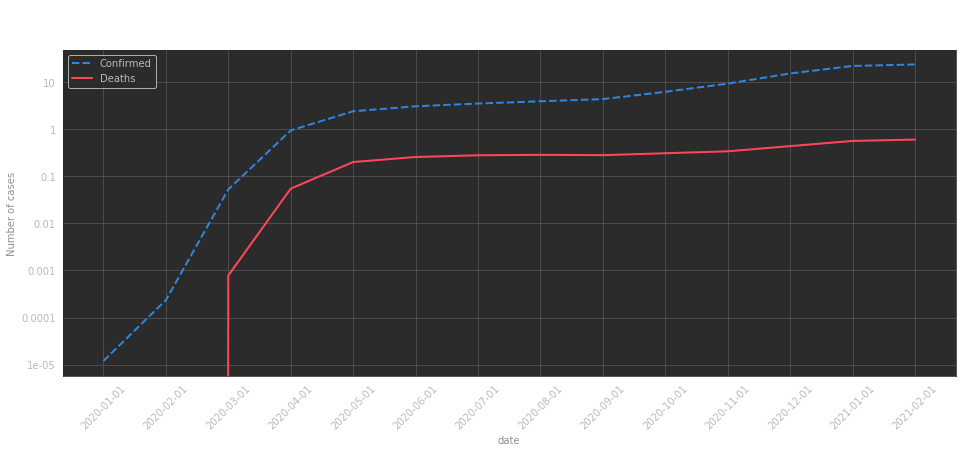

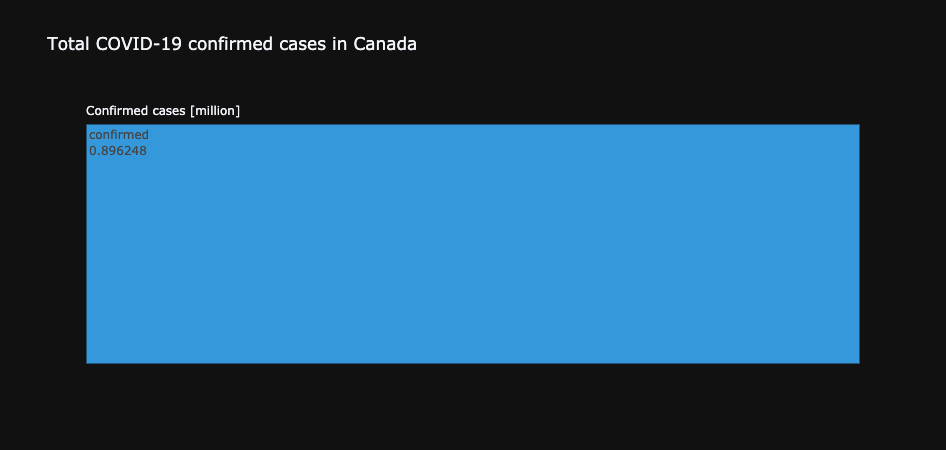

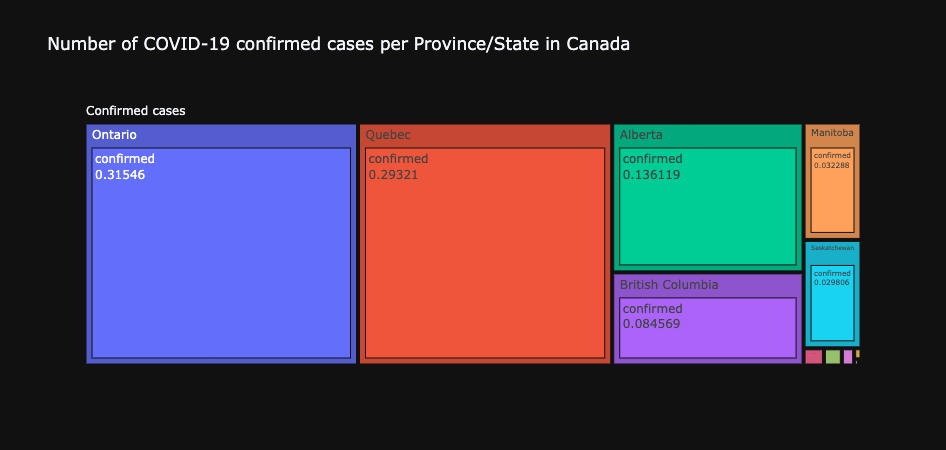

In [43]:
get_country_covid_info('Canada', log=True)

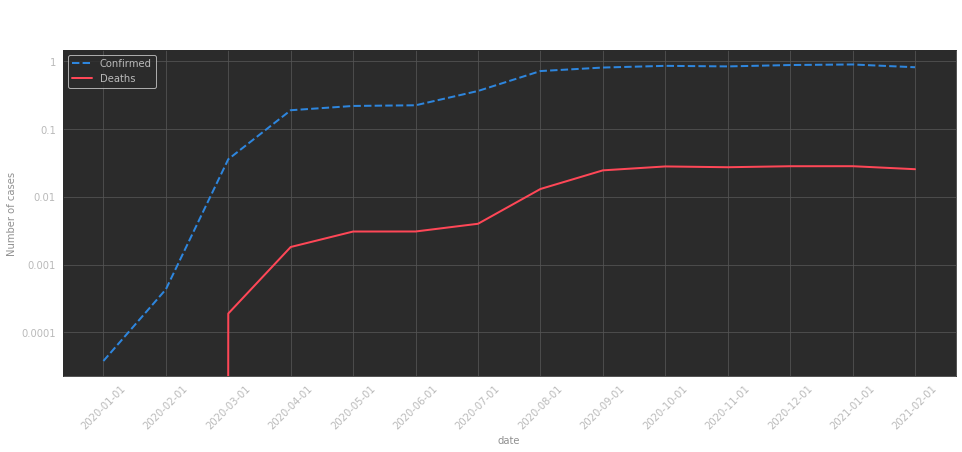

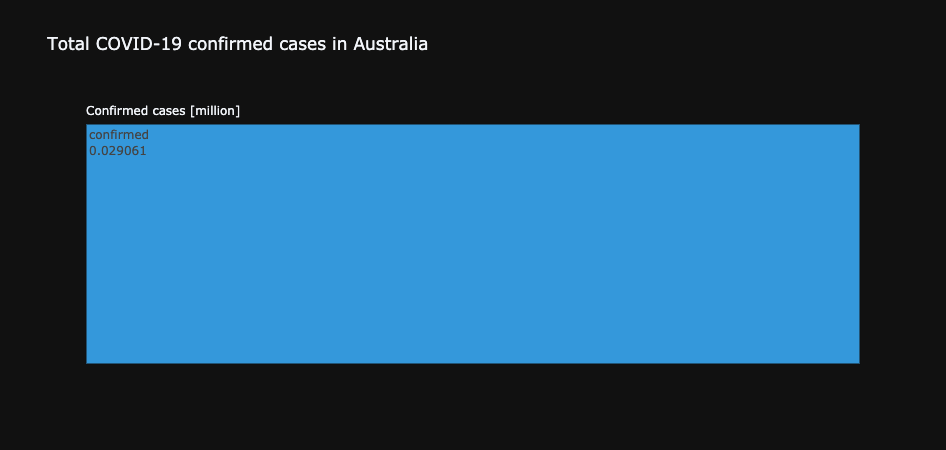

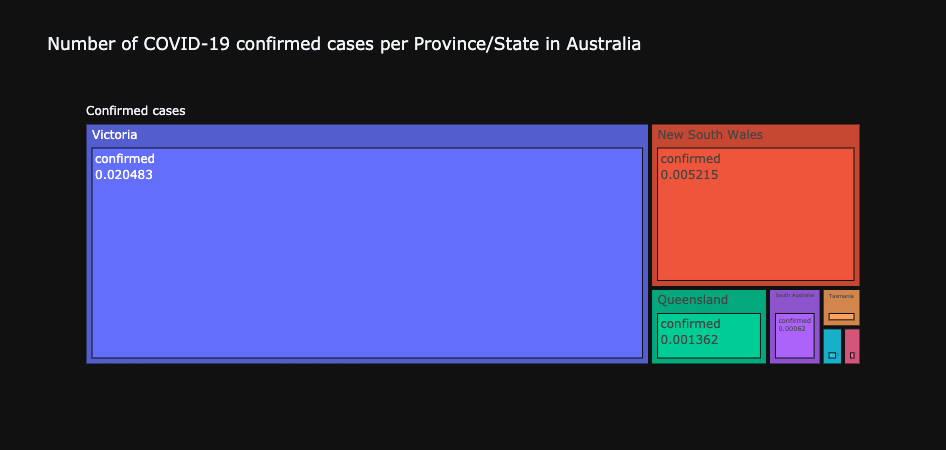

In [44]:
get_country_covid_info('Australia', log=True)

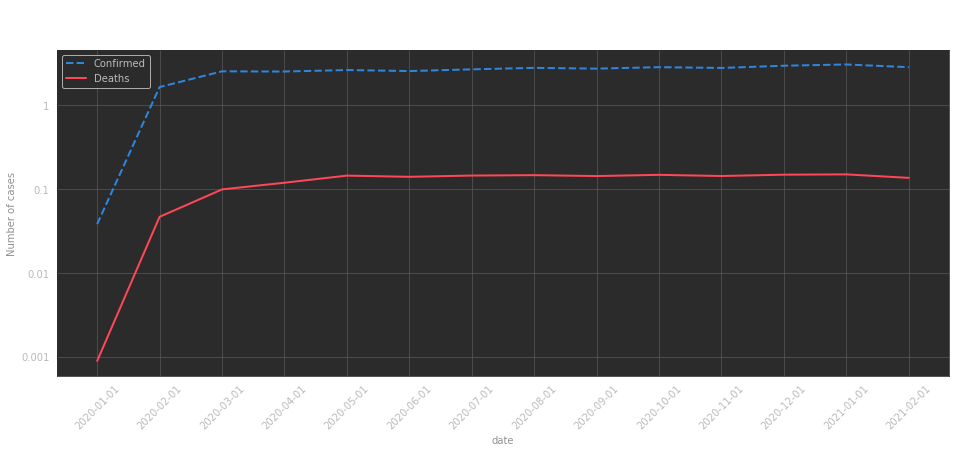

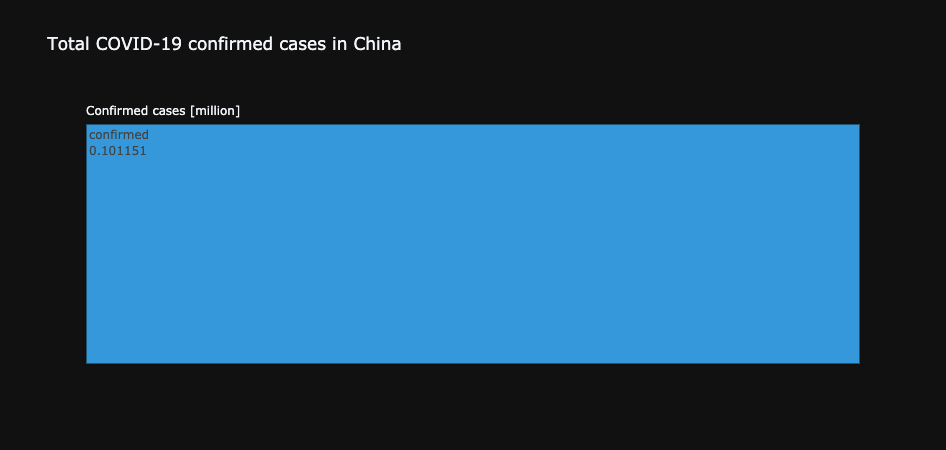

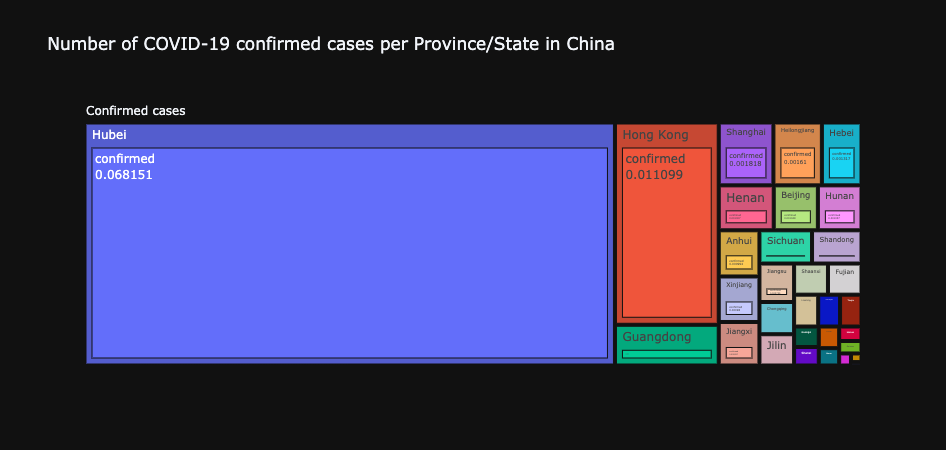

In [45]:
get_country_covid_info('China', log=True)

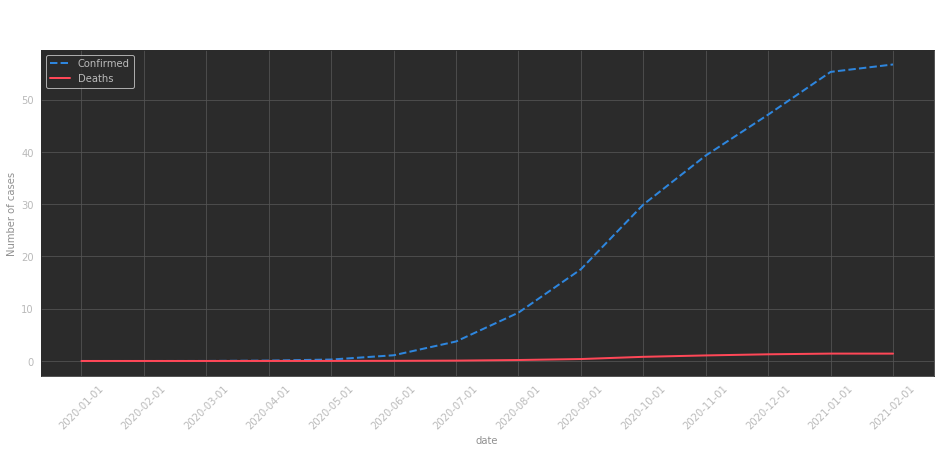

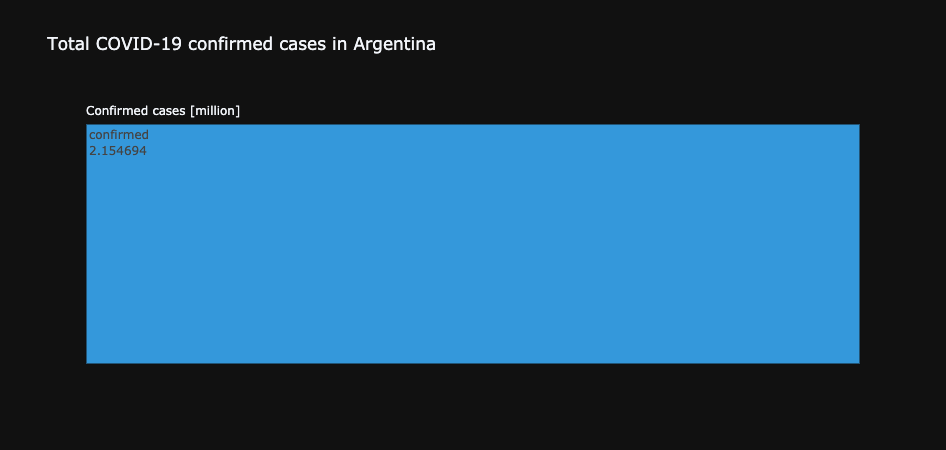

There is no information of provinces/states


In [46]:
get_country_covid_info('Argentina', log=False)

Go ahead and try other countries!

In [47]:
get_country_covid_info('<OTHER_COUNTRY>')

IndexError: index 0 is out of bounds for axis 0 with size 0

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)